In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
%matplotlib inline

In [2]:
population = pd.read_csv('Data_clean/Population_clean.csv', index_col=0)
diabetes = pd.read_csv('Data_clean/diabetes_clean.csv', index_col=0)
malnutrition = pd.read_csv('Data_clean/malnutrition_clean.csv', index_col=0)
c_stomach = pd.read_csv('Data_clean/c_stomach_clean.csv', index_col=0)
c_oral = pd.read_csv('Data_clean/c_oral_clean.csv', index_col=0)
c_oesophagus = pd.read_csv('Data_clean/c_oesophagus_clean.csv', index_col=0)
c_colon = pd.read_csv('Data_clean/c_colon_clean.csv', index_col=0)

In [3]:
diseases = pd.concat([diabetes, malnutrition['Malnutrition'], c_stomach['Cancer stomach'], c_oral['Cancer oral'],
                     c_oesophagus['Cancer oesophagus'], c_colon['Cancer colon']], axis=1)
diseases.head()

,Year,Diabetes,Malnutrition,Cancer stomach,Cancer oral,Cancer oesophagus,Cancer colon
0,1990,97593.0,2583.0,110879.0,28546.0,27621.0,141882.0
1,1991,99426.0,2630.0,110065.0,29734.0,28144.0,144479.0
2,1992,97965.0,2896.0,108402.0,30653.0,28439.0,148522.0
3,1993,98573.0,2866.0,104977.0,30906.0,29002.0,149575.0
4,1994,96827.0,2820.0,103738.0,31294.0,29533.0,152901.0


In [4]:
diseases = pd.merge(diseases, population, on='Year')
diseases.head()

,Year,Diabetes,Malnutrition,Cancer stomach,Cancer oral,Cancer oesophagus,Cancer colon,Population
0,1990,97593.0,2583.0,110879.0,28546.0,27621.0,141882.0,476014973
1,1991,99426.0,2630.0,110065.0,29734.0,28144.0,144479.0,477383683
2,1992,97965.0,2896.0,108402.0,30653.0,28439.0,148522.0,478743459
3,1993,98573.0,2866.0,104977.0,30906.0,29002.0,149575.0,480227396
4,1994,96827.0,2820.0,103738.0,31294.0,29533.0,152901.0,481398505


In [5]:
diseases['Diabetes %'] = diseases['Diabetes'] / diseases['Population'] * 100
diseases['Malnutrition %'] = diseases['Malnutrition'] / diseases['Population'] * 100
diseases['Cancer stomach %'] = diseases['Cancer stomach'] / diseases['Population'] * 100
diseases['Cancer oral %'] = diseases['Cancer oral'] / diseases['Population'] * 100
diseases['Cancer oesophagus %'] = diseases['Cancer oesophagus'] / diseases['Population'] * 100
diseases['Cancer colon %'] = diseases['Cancer colon'] / diseases['Population'] * 100
diseases.head()

,Year,Diabetes,Malnutrition,Cancer stomach,Cancer oral,Cancer oesophagus,Cancer colon,Population,Diabetes %,Malnutrition %,Cancer stomach %,Cancer oral %,Cancer oesophagus %,Cancer colon %
0,1990,97593.0,2583.0,110879.0,28546.0,27621.0,141882.0,476014973,0.020502,0.000543,0.023293,0.005997,0.005803,0.029806
1,1991,99426.0,2630.0,110065.0,29734.0,28144.0,144479.0,477383683,0.020827,0.000551,0.023056,0.006229,0.005895,0.030265
2,1992,97965.0,2896.0,108402.0,30653.0,28439.0,148522.0,478743459,0.020463,0.000605,0.022643,0.006403,0.005940,0.031023
3,1993,98573.0,2866.0,104977.0,30906.0,29002.0,149575.0,480227396,0.020526,0.000597,0.021860,0.006436,0.006039,0.031147
4,1994,96827.0,2820.0,103738.0,31294.0,29533.0,152901.0,481398505,0.020114,0.000586,0.021549,0.006501,0.006135,0.031762


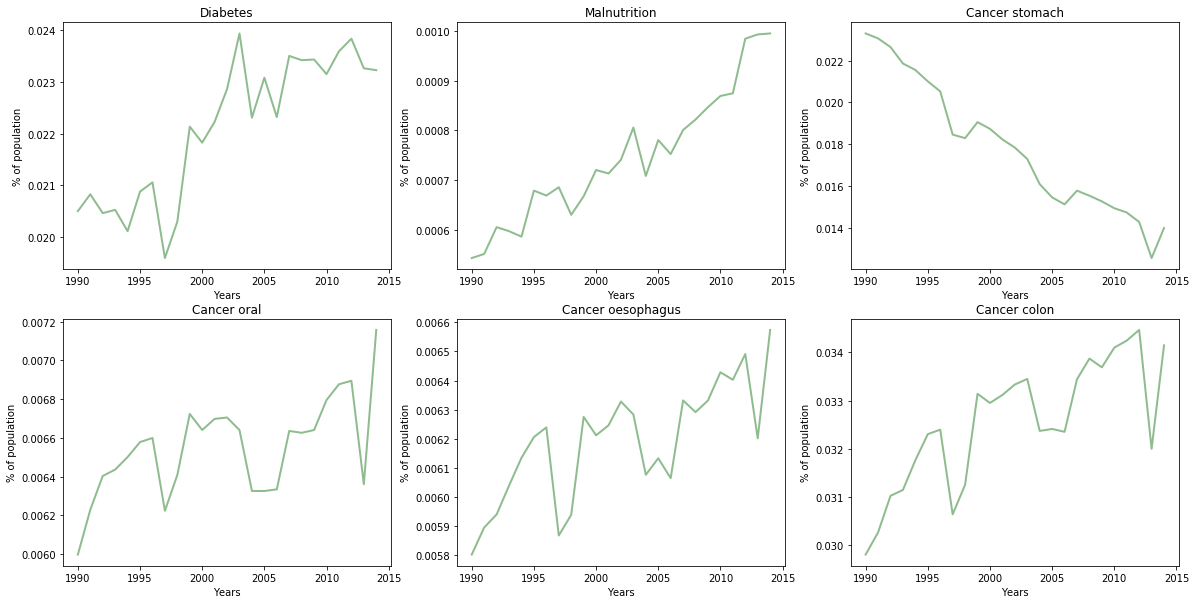

In [23]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

axs[0,0].plot(diseases['Year'], diseases['Diabetes %'], color='darkseagreen', linewidth=2)
axs[0,0].set_title('Diabetes')
axs[0,0].set_xlabel('Years')
axs[0,0].set_ylabel('% of population')

axs[0,1].plot(diseases['Year'], diseases['Malnutrition %'], color='darkseagreen', linewidth=2)
axs[0,1].set_title('Malnutrition')
axs[0,1].set_xlabel('Years')
axs[0,1].set_ylabel('% of population')

axs[0,2].plot(diseases['Year'], diseases['Cancer stomach %'], color='darkseagreen', linewidth=2)
axs[0,2].set_title('Cancer stomach')
axs[0,2].set_xlabel('Years')
axs[0,2].set_ylabel('% of population')

axs[1,0].plot(diseases['Year'], diseases['Cancer oral %'], color='darkseagreen', linewidth=2)
axs[1,0].set_title('Cancer oral')
axs[1,0].set_xlabel('Years')
axs[1,0].set_ylabel('% of population')

axs[1,1].plot(diseases['Year'], diseases['Cancer oesophagus %'], color='darkseagreen', linewidth=2)
axs[1,1].set_title('Cancer oesophagus')
axs[1,1].set_xlabel('Years')
axs[1,1].set_ylabel('% of population')

axs[1,2].plot(diseases['Year'], diseases['Cancer colon %'], color='darkseagreen', linewidth=2)
axs[1,2].set_title('Cancer colon')
axs[1,2].set_xlabel('Years')
axs[1,2].set_ylabel('% of population')

plt.show()

In [7]:
diseases.to_csv('Data_Clean/diseases_final.csv')

## Analysis

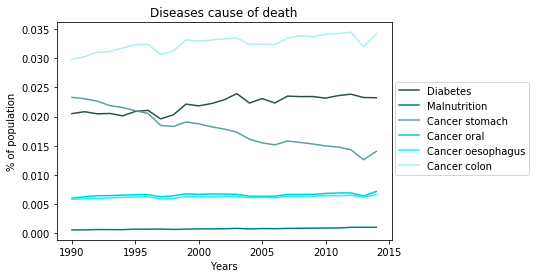

In [37]:
plt.plot(diseases['Year'], diseases['Diabetes %'], color='darkslategrey')
plt.plot(diseases['Year'], diseases['Malnutrition %'], color='teal')
plt.plot(diseases['Year'], diseases['Cancer stomach %'], color='cadetblue')
plt.plot(diseases['Year'], diseases['Cancer oral %'], color='darkturquoise')
plt.plot(diseases['Year'], diseases['Cancer oesophagus %'], color='cyan')
plt.plot(diseases['Year'], diseases['Cancer colon %'], color='paleturquoise')

plt.xlabel('Years')
plt.ylabel('% of population')
plt.title('Diseases cause of death')
plt.legend(('Diabetes', 'Malnutrition', 'Cancer stomach', 'Cancer oral', 'Cancer oesophagus', 'Cancer colon'),
           loc='upper center', bbox_to_anchor=(1.21, 0.75))
plt.show()

In [9]:
f_oneway(diseases['Cancer oral'], diseases['Cancer oesophagus'], diseases['Cancer colon'])

F_onewayResult(statistic=4644.687911843794, pvalue=7.865772120818756e-77)